In [1]:
#function to test models 
import nest_asyncio
import warnings
from mb_utils.src.logging import logger

nest_asyncio.apply()
warnings.filterwarnings("ignore")

In [2]:
from mb_pytorch.utils.version import version
version

'1.2.25'

In [3]:
from mb_pytorch.dataloader.loader import DataLoader

k = DataLoader('../scripts/detection/object_detection.yaml',logger=logger)
k_data = k.data_dict['data']
model_data_dict = k.data_dict['model']

Fri 03:29:01,666 INF Read data from yaml file: [{'data': {'file': {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dat


In [4]:
from mb_pytorch.training.train_params import train_helper
model_yaml_data = k.data_dict['model']
loss_attr,optimizer_attr,optimizer_dict,scheduler_attr,scheduler_dict = train_helper(model_yaml_data) 

In [5]:
from torch.utils.tensorboard import SummaryWriter
import os

path_logs = os.path.join(os.path.split(k_data['file']['root'])[0], 'logs')
writer = SummaryWriter(log_dir=path_logs)


In [6]:
train_loader,val_loader,train_dataset,test_dataset = k.data_load()


50row [00:00, 26306.47row/s]
Fri 03:29:01,719 INF Loaded dataframe from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv
Fri 03:29:01,721 INF Data file: {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv'
Fri 03:29:01,721 INF Data columns: Index(['image_id', 'image_path', 'bbox', 'label', 'image_type'], dtype='object')                  
Fri 03:29:01,723 INF Data will be split into train and validation according to train_file input : True                               
Fri 03:29:01,723 INF If unnamed columns are present, they will be removed.                                                           
Fri 03:29:01,724 INF If duplicate rows are present, they will be removed.                                                            
Fri 03:29:01,726 INF Length of data after removing invalid paths: 50                                                                 
Fri 03:29:01,727 INF Skipping ima

In [7]:
train_dataset.__getitem__(0)

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [8]:
test_dataset.__getitem__(4)

(tensor([[[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ...,

In [9]:
from mb_pytorch.models.modelloader import ModelLoader
model_data_load = ModelLoader(k.data_dict['model'])
model =  model_data_load.get_model()

Fri 03:29:02,305 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   


In [10]:
from mb_pytorch.detection.training import detection_train_loop


Fri 03:29:02,388 INF Training loop Starting                                                                                          
Fri 03:29:02,954 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   
Fri 03:29:02,956 INF Model Loaded                                                                                                    
50row [00:00, 41593.65row/s]
Fri 03:29:02,960 INF Loaded dataframe from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv
Fri 03:29:02,961 INF Data file: {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv'
Fri 03:29:02,962 INF Data columns: Index(['image_id', 'image_path', 'bbox', 'label', 'image_type'], dtype='object')                  
Fri 03:29:02,963 INF Data will be split into train and validation according to train_file input : True                               
Fri 03:29:02,964 INF If unnamed c

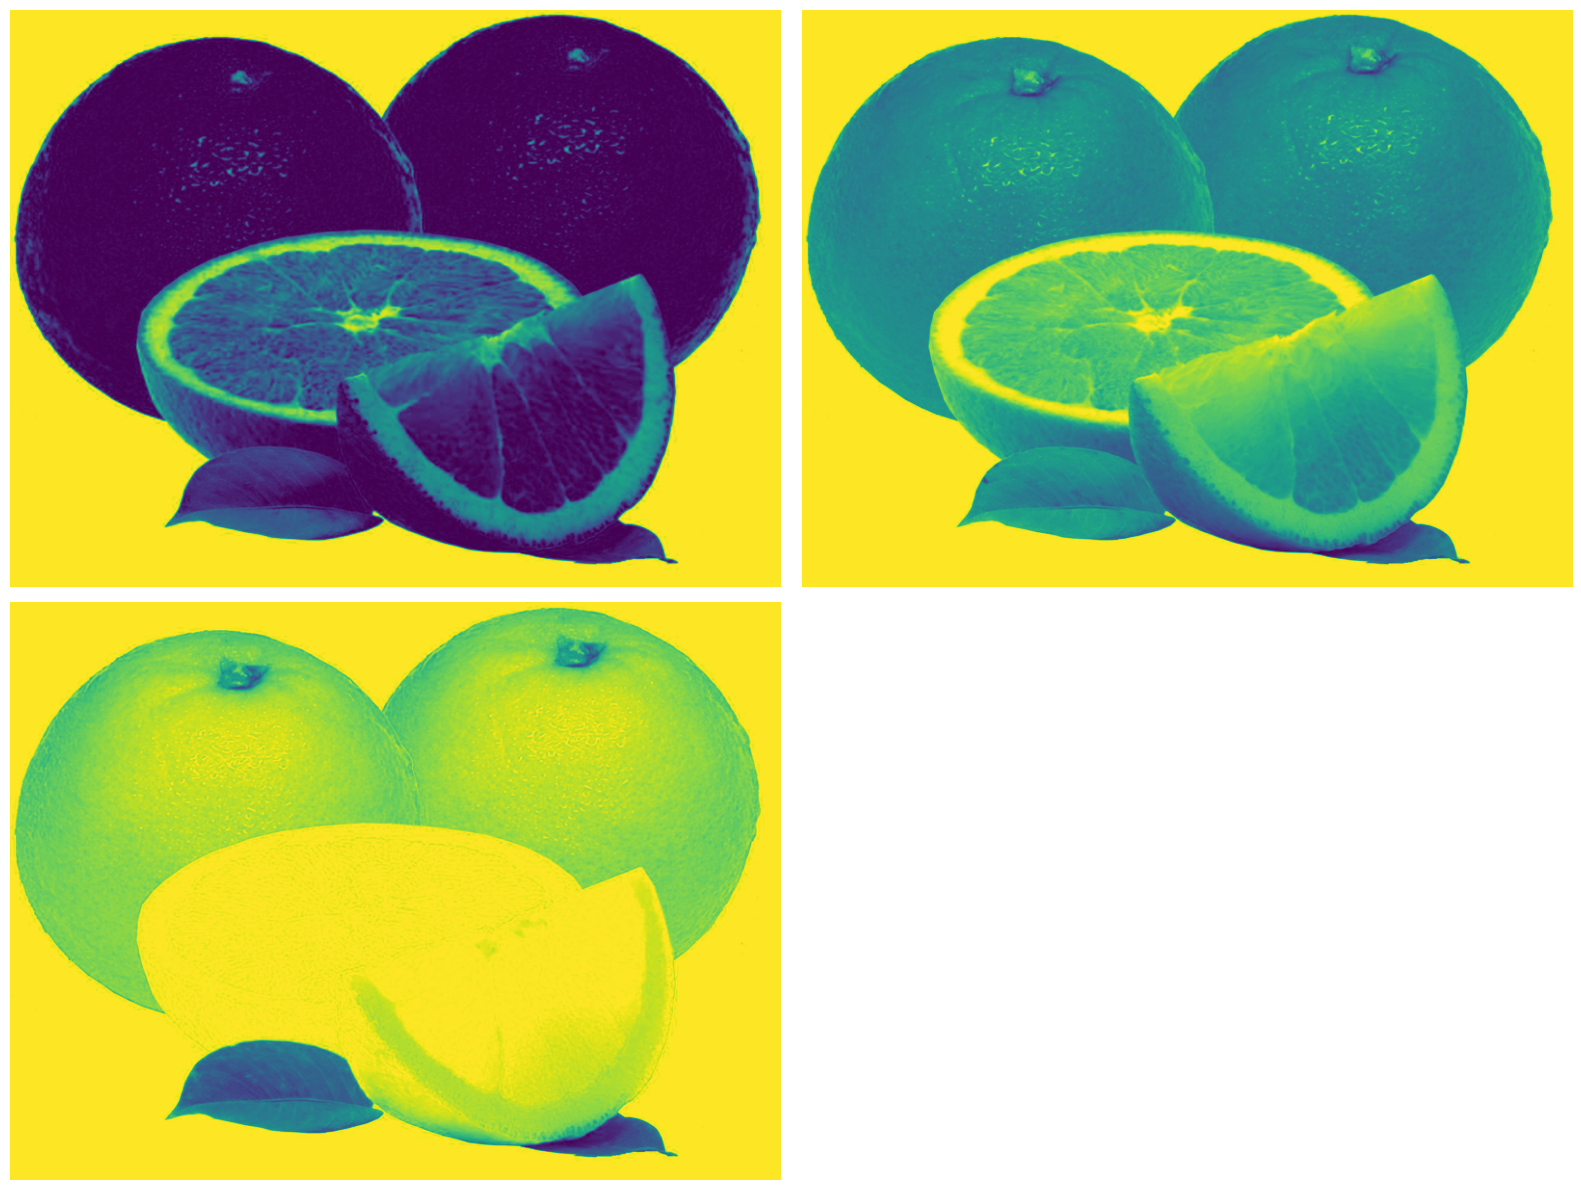

Fri 03:33:04,933 INF Epoch 1 - Best Model Saved (Val Loss: 0.2642)                                                                   
Epochs:  20%|██        | 1/5 [04:01<16:07, 241.93s/it]Fri 03:33:04,937 INF Training Started                                                                                                

Training:   0%|          | 0/13 [00:00<?, ?it/s]Fri 03:33:20,378 INF Epoch 2 - Batch 1 - Train Loss: 0.1963982880115509                                                              

Training:   8%|▊         | 1/13 [00:15<03:05, 15.44s/it]Fri 03:33:34,173 INF Epoch 2 - Batch 2 - Train Loss: 0.15427722036838531                                                             

Training:  15%|█▌        | 2/13 [00:29<02:39, 14.47s/it]Fri 03:33:47,081 INF Epoch 2 - Batch 3 - Train Loss: 0.10041768103837967                                                             

Training:  23%|██▎       | 3/13 [00:42<02:17, 13.76s/it]Fri 03:34:00,704 INF Epoch 2 - Batch 4 - Train Loss: 0.2

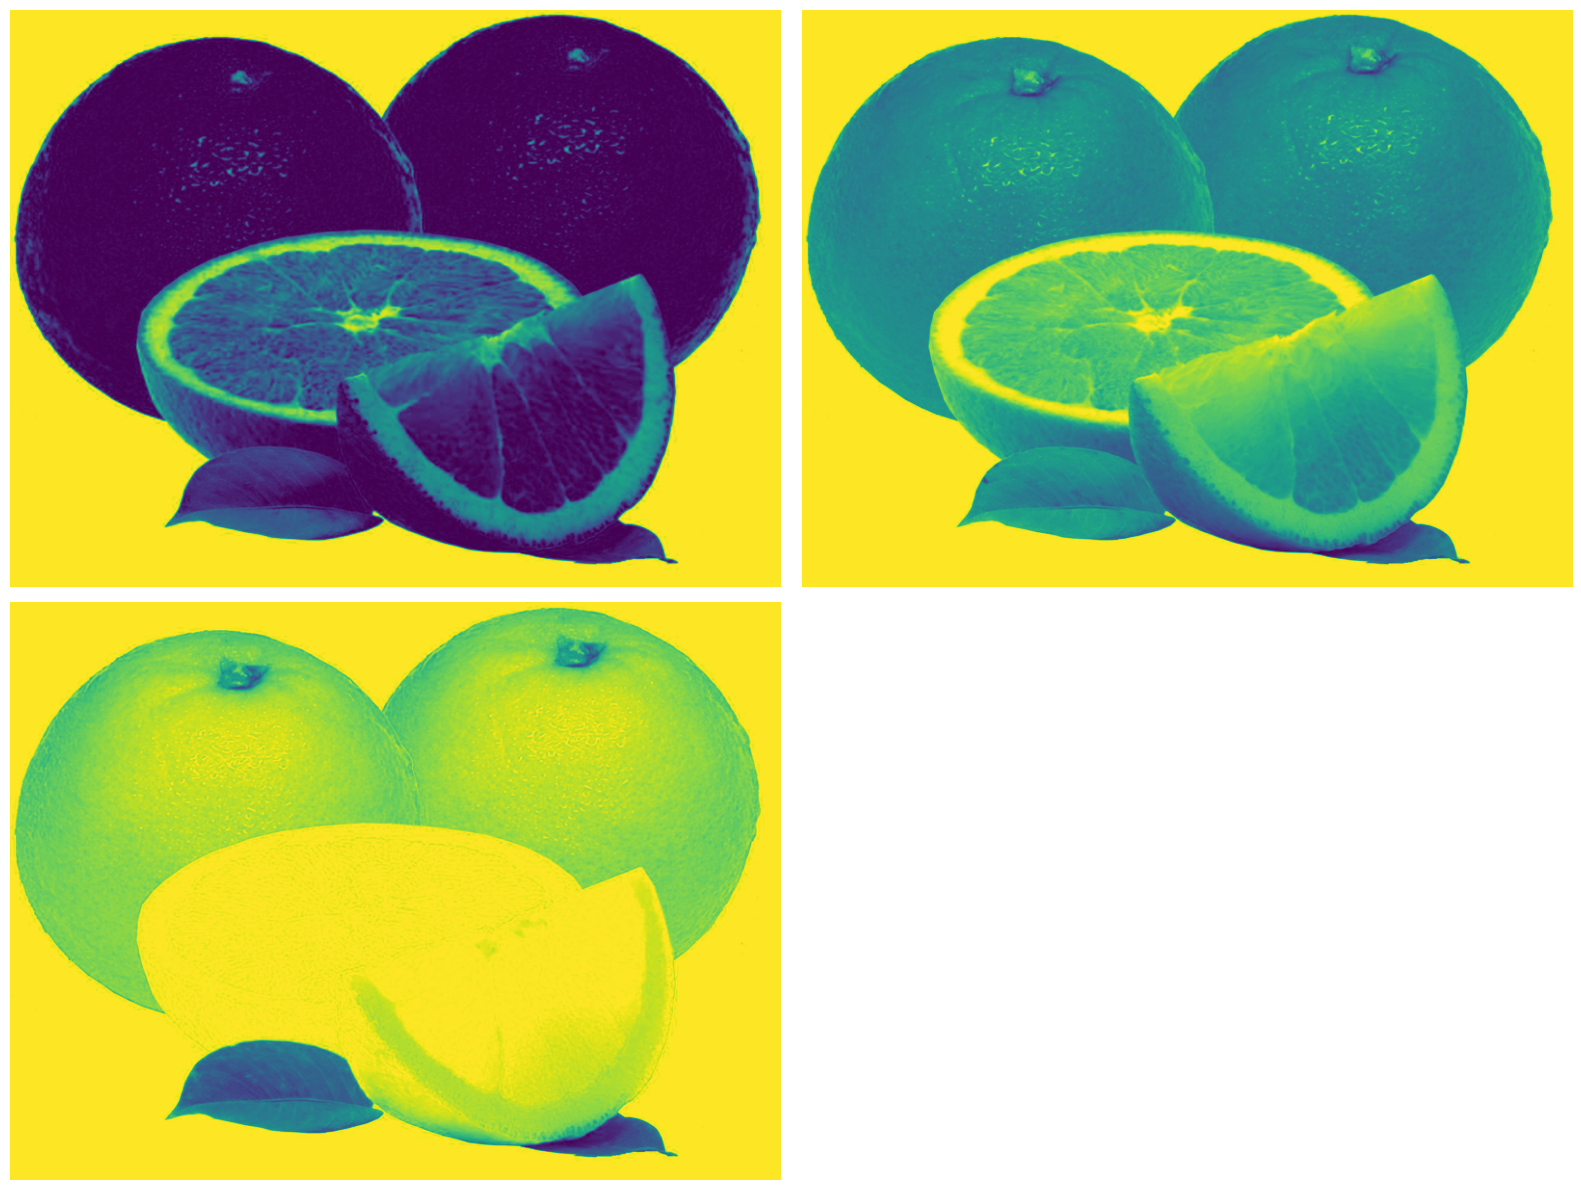

Epochs:  40%|████      | 2/5 [08:08<12:13, 244.63s/it]Fri 03:37:11,487 INF Training Started                                                                                                

Training:   0%|          | 0/13 [00:00<?, ?it/s]Fri 03:37:27,979 INF Epoch 3 - Batch 1 - Train Loss: 0.18422967195510864                                                             

Training:   8%|▊         | 1/13 [00:16<03:17, 16.48s/it]Fri 03:37:42,809 INF Epoch 3 - Batch 2 - Train Loss: 0.16749262809753418                                                             

Training:  15%|█▌        | 2/13 [00:31<02:50, 15.51s/it]Fri 03:37:57,206 INF Epoch 3 - Batch 3 - Train Loss: 0.11459947377443314                                                             

Training:  23%|██▎       | 3/13 [00:45<02:29, 15.00s/it]Fri 03:38:12,293 INF Epoch 3 - Batch 4 - Train Loss: 0.2526818513870239                                                              

Training:  31%|███       | 4/13 [01:00<02:15, 15.03s/it

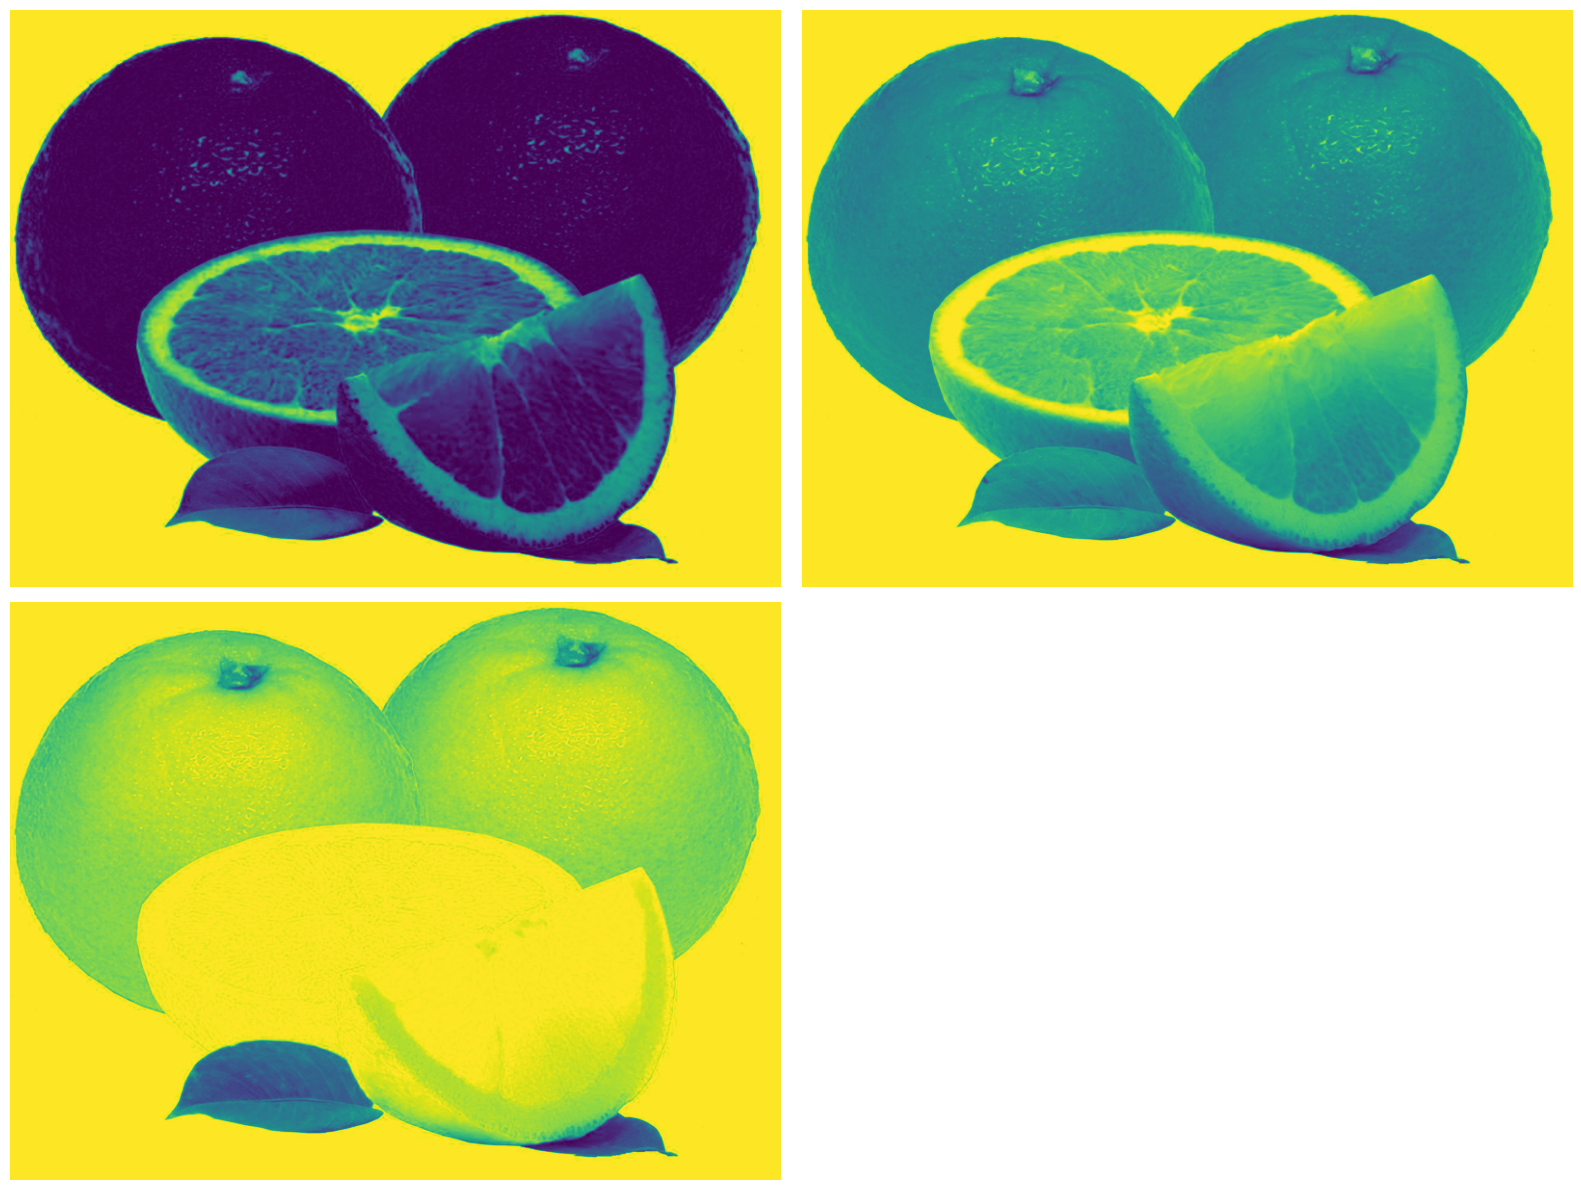

Epochs:  60%|██████    | 3/5 [12:33<08:27, 253.95s/it]Fri 03:41:36,535 INF Training Started                                                                                                

Training:   0%|          | 0/13 [00:00<?, ?it/s]Fri 03:41:52,119 INF Epoch 4 - Batch 1 - Train Loss: 0.18492627143859863                                                             

Training:   8%|▊         | 1/13 [00:15<03:04, 15.42s/it]Fri 03:42:06,755 INF Epoch 4 - Batch 2 - Train Loss: 0.1617719829082489                                                              

Training:  15%|█▌        | 2/13 [00:30<02:44, 14.96s/it]Fri 03:42:21,506 INF Epoch 4 - Batch 3 - Train Loss: 0.11420082300901413                                                             

Training:  23%|██▎       | 3/13 [00:44<02:28, 14.86s/it]Fri 03:42:36,241 INF Epoch 4 - Batch 4 - Train Loss: 0.2474130094051361                                                              

Training:  31%|███       | 4/13 [00:59<02:13, 14.81s/it

KeyboardInterrupt: 

In [11]:
detection_train_loop(k,model_data_dict,writer=writer,logger=logger,gradcam=False)

In [ ]:
## tests